# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autora rozwiązania (imię, nazwisko i numer indeksu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Imię i nazwisko:
Numer indeksu:

---

# Kolowkium zaliczeniowe: 1 termin, grupa 1

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

## Dane do automatycznych testów

In [3]:
# Dane do testów 1
test_data_1 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=20, random_state=7), columns=["X"])
test_data_1.head()


,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


In [4]:
test_data_2 = pd.DataFrame(data=sp.stats.norm.rvs(loc=5, scale=0.2, size=15, random_state=7), columns=["X"])
test_data_2.head()

,X
0,5.338105
1,4.906813
2,5.006564
3,5.081503
4,4.842215


## Zadanie 1 [4 pkt]

Badania kliniczne pokazały, że po podaniu pewnego leku w 10% przypadków występują skutki uboczne wymagające hospitalizacji.

W pewnej klinice podano lek grupie 30 pacjentów. Jakie jest prawdopodobieństwo, że co najmniej 25 z tych osób nie będzie wymagało hospitalizacji?

Wynik zapisz do zmiennej `p`.

In [5]:
from scipy.stats import binom
s = [binom.pmf(k=x, n=30, p=0.9) for x in range(25, 31)]  # 0.9 nie 
print(s)
p = sum(s)
p

[0.10230477063401505, 0.17706594917425708, 0.23608793223234256, 0.22765622036690186, 0.14130386091738745, 0.042391158275216265]


0.9268098916001202

In [6]:
# Komórka testowa
assert isinstance(p, float)


## Zadanie 2 [6 pkt]

Przygotuj funkcję `variance_estimation()`, która będzie dokonywała estymacji przedziałowej wariancji dla danych wejściowych w postaci szeregu szczegółowego zgodnie z informacjami zawartymi w docstring funkcji oraz ze schematem z załączonego do notatnika zestawu wzorów (przypadek dla nieznanej wartości oczekiwanej populacji).

Uwaga! Zadanie dotyczy tradycyjnej estymacji, nie metody bootstrap.

In [13]:
from scipy.stats import chi2
def variance_estimation(data, alpha):
    n = len(data)
    x_var = np.var(data['X'], ddof=1)
    #print(x_mean)
    #x_var2 = sum((data['X'] - np.mean(data['X']))**2)/(n - 1)
    #print(x_mean2)
    x_min = ( (n - 1) * x_var )/ (chi2.ppf(1 - alpha/2, n - 1))
    x_max = ( (n - 1) * x_var )/ (chi2.ppf(alpha/2, n - 1))
    return (x_min, x_max)
variance_estimation(test_data_1, 0.1)
    

(0.018268125369359626, 0.05442967510189219)

In [14]:
# Komórka testowa
result = variance_estimation(test_data_1, 0.1)
assert type(result)==tuple or type(result)==list
assert len(result)==2
assert isinstance(result[0], float)
assert isinstance(result[1], float)


## Zadanie 3 [6 pkt]

Przygotuj funkcję `mean_NHST()`, która będzie weryfikować hipotezę o wartości przeciętnej dla danych wejściowych w postaci szeregu szczegółowego zgodnie z informacjami zawartymi w docstring funkcji oraz ze schematem z załączonego do notatnika zestawu wzorów.

Uwaga! Zadanie dotyczy tradycyjnej weryfikacji, nie metody bootstrap.

In [10]:
from scipy.stats import t
def mean_NHST(data, H0, H1, alpha): 
    n = len(data)
    x_mean = np.mean(data['X'])
    s = np.std(data['X'])
    t_val = (x_mean - H0) * np.sqrt(n - 1) / s
    if H1 == 'two-sided':
        t_alpha = t.ppf(1 - alpha/2, n - 1)
        if np.abs(t_val) >= t_alpha:
            return (t_val, t_alpha, 1)
    elif H1 == 'less':
        t_alpha = t.ppf(alpha, n-1)
        if t_val <= t_alpha:
            return (t_val, t_alpha, 1)
    elif H1 == 'greater':
        t_alpha = t.ppf(1 - alpha, n - 1)
        if t_val >= t_alpha:
            return (t_val, t_alpha, 1)
    return (t_val, t_alpha, 0)
mean_NHST(test_data_2, 5.08, "two-sided", 0.05)

(-1.9346677837081263, 2.1447866879169273, 0)

In [11]:
# Komórka testowa
result = mean_NHST(test_data_2, 5.08, "two-sided", 0.05)
assert type(result)==tuple or type(result)==list
assert len(result)==3
assert isinstance(result[0], float)
assert isinstance(result[1], float)
assert isinstance(result[2], float) or isinstance(result[2], int)


## Zadanie 4 [12 pkt]

Zmienna `pulse` zawiera informacje na temat osób biorących udział w badaniu tętna przed i po wysiłku fizycznym (trzy "okrążenia" chodząc w górę i w dół po schodach):
 - Active - tętno (uderzenia na minutę) po ćwiczeniach
 - Rest - tętno spoczynkowe (uderzenia na minutę)
 - Sex - płeć
 - Hgt - wzrost (w calach)
 - Wgt - waga (w funtach)

In [12]:
pulse = pd.read_csv("pulse_data.csv", index_col=0)
pulse

,Active,Rest,Sex,Hgt,Wgt
0,97,78,Female,63,119
1,82,68,Male,70,225
2,88,62,Male,72,175
3,106,74,Male,72,170
4,78,63,Female,67,125
...,...,...,...,...,...
227,105,85,Female,64,150
228,82,74,Female,66,124
229,102,81,Male,69,172
230,87,67,Male,68,170


### a)

W oparciu o dane ze zmiennej `pulse` przygotuj wykresy korelacyjne i kde (pairplot) zestawiające ze sobą poszczególne parametry liczbowe (osie X, Y) z podziałem na płeć osób biorących udział w badaniu (rozróżnione kolorem) i ustaw:
 - inną od domyślnej skalę kolorów (każda płeć ma przypisany inny kolor wykresu),
 - inne od domyślnych własności punktów (kształt, wielkość, przeźroczystość) dobrane tak, aby wykres był jak najbardziej czytelny.

<Figure size 1500x1500 with 0 Axes>

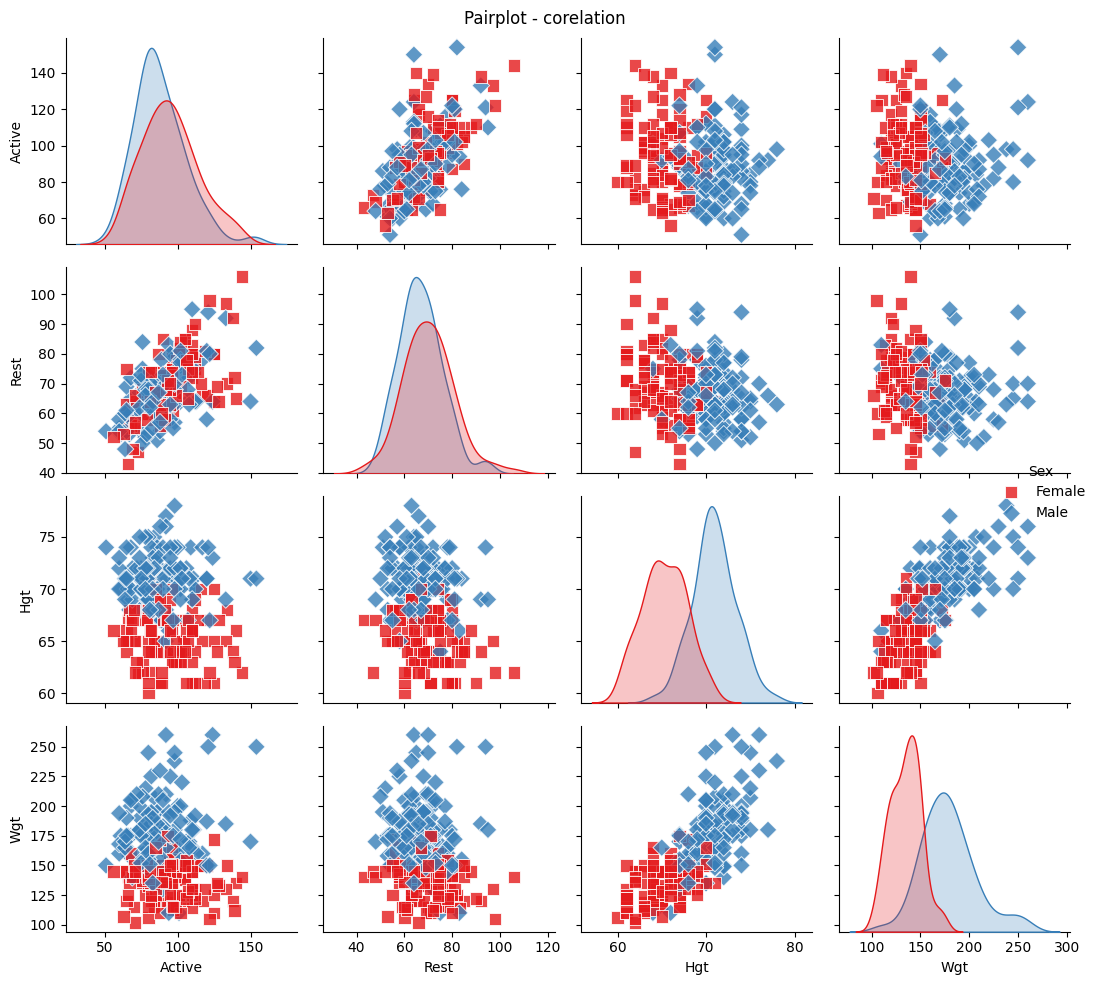

In [37]:
plt.figure(figsize=(15, 15))
sns.pairplot(pulse, hue='Sex', diag_kind='kde', palette='Set1', markers=['s', 'D'], plot_kws={'s':80, 'alpha':0.8})
plt.suptitle('Pairplot - corelation')
plt.tight_layout()
plt.show()

### b)

W oparciu o dane ze zmiennej `pulse` przygotuj wykresy violinplot i stripplot wybranego przez siebie parametru liczbowego (oś Y) z podziałem na rozróżnioną kolorem płeć (oś X).

Wykresy zestaw na pojedynczej figurze (1x2 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Dodatkowo ustaw:
 - dla wykresu violinplot:
     - inny od domyślnego kolor wykresu,
 - dla wykresu stripplot:
     - inne od domyślnych rozmiar, kolor i przeźroczystość punktów (dobierz parametry tak, aby wykres był jak najbardziej przejrzysty).

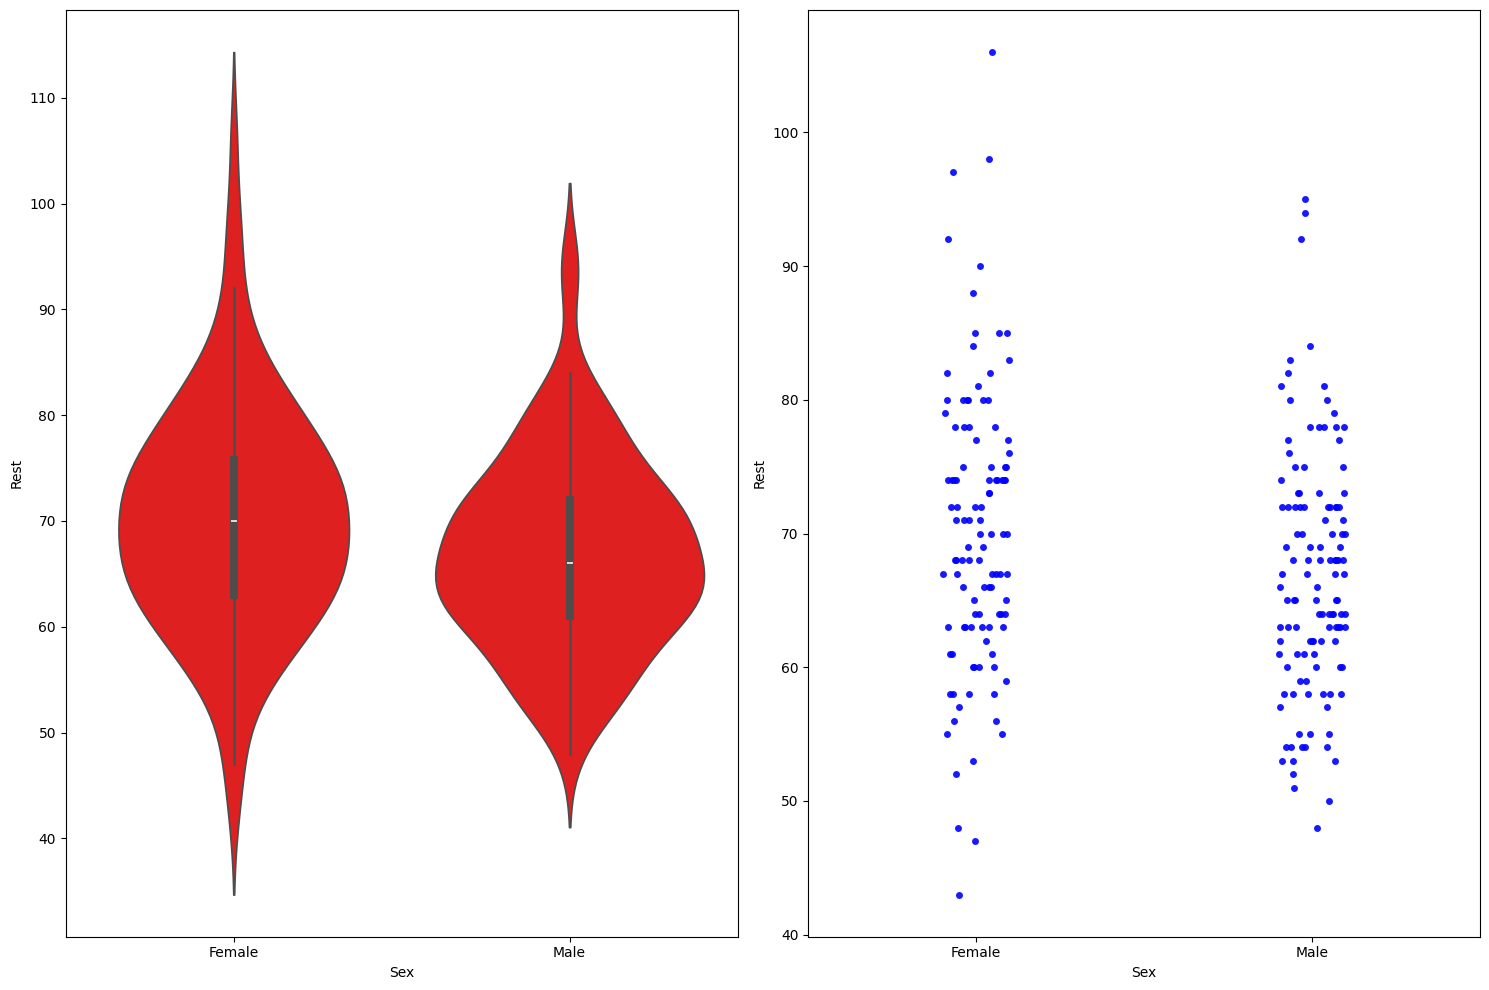

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.violinplot(pulse, x = 'Sex', y = 'Rest', color='red', ax=ax[0])
sns.stripplot(pulse, x = 'Sex', y = 'Rest', size=5, color='blue', alpha=0.9, ax=ax[1])
plt.tight_layout()
plt.show()

### c)

Załóżmy, że zmianna `pulse` zawiera pełną populację wyników ekperymentu. Wylosuj z niej i zapisz do zmiennej `sample` próbę losową zawierającą po 20 osób każdej płci wylosowanych bez zwracania.

In [51]:
sample = pulse.groupby('Sex').apply(lambda x: x.sample(20, replace=True))

C:\Users\marci\AppData\Local\Temp\ipykernel_22784\1159630629.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = pulse.groupby('Sex').apply(lambda x: x.sample(20, replace=True))


In [52]:
# Komórka testowa
assert type(sample) == pd.DataFrame


### d)

Korzystając z dedykowanej do tego funkcji pakietu scipy dokonaj estymacji przedziałowej współczynnika korelacji liniowej między tętnem aktywnym a pasywnym uczestników eksperymentu na poziomie istotności 1-alpha = 0.9.

Wynik zapisz do zmiennej `r_ci` zawierającej listę lub krotkę z dolną i górną granicą przedziału ufności. Ustaw wartość argumentu funkcji odpowiadającego za ziarno generatora liczb losowych funkcji na 127.

In [57]:
from scipy.stats import bootstrap
f = bootstrap((pulse['Active'], pulse['Rest']), sp.stats.pearsonr, random_state=127, confidence_level = 0.9, paired=True).confidence_interval
r_ci = (f[0][0], f[1][0])
r_ci


(0.5205432785342575, 0.6788172347787544)

In [58]:
# Komórka testowa
assert type(r_ci)==tuple or type(r_ci)==list
assert len(r_ci)==2
assert isinstance(r_ci[0], float)
assert isinstance(r_ci[1], float)


### e)

Korzystając z dedykowanej funkcji pakietu scipy zweryfikuj hipotezę, że tętna aktywne kobiet i mężczyzn biorących udział w eksperymencie mają taki sam rozkład statystyczny. W obliczeniach przyjmij poziom istotności 1 - alpha = 0.98.

Zapisz obliczoną wartość pvalue do zmiennej `pvalue`, oraz przygotuj zmienną `H` zawierającą wynik testu statystycznego (0 - gdy wynik testu istotności nie daje podstaw do odrzucenia H0 na rzecz H1 na poziomie istotności 1-alpha, 1 - gdy następuje odrzucenie H0 na rzecz H1 na poziomie istotności 1-alpha).

In [60]:
from scipy.stats import kstest
male = pulse[pulse['Sex'] == 'Male']
female = pulse[pulse['Sex'] == 'Female']
pvalue = kstest(male['Active'].dropna(), female['Active'].dropna()).pvalue
if pvalue <= 0.02:
  H = 1
else:
  H = 0

In [61]:
# Komórka testowa
assert isinstance(pvalue, float)
assert isinstance(H, float) or isinstance(H, int)
